# Graphs and co.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
sys.path.append("..")

/home/steve/projects/nnqs/tf-gpu-venv/lib64/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/steve/projects/nnqs/tf-gpu-venv/lib64/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


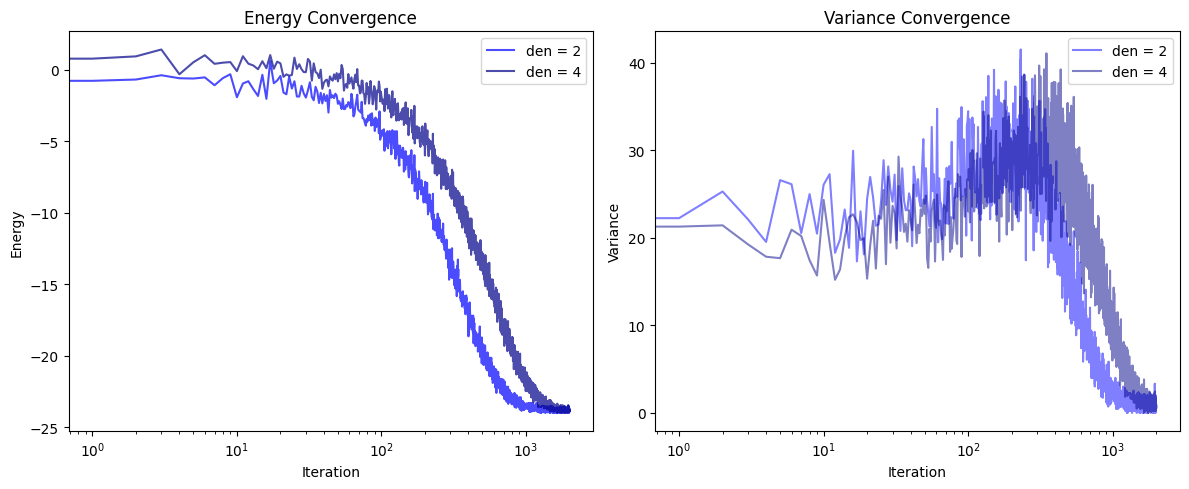

In [13]:
results_ising_2 = np.load("../data/16spin_2_SR_history.npz")
results_ising_4 = np.load("../data/16spin_4_SR_history.npz")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
blues = ['blue', 'lightblue', 'darkblue']
plt.plot(results_ising_2['energies'], label='den = 2', color=blues[0], alpha=0.7)
plt.plot(results_ising_4['energies'], label='den = 4', color=blues[2], alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy Convergence')
plt.legend()
plt.xscale('log')
plt.subplot(1, 2, 2)
plt.plot(results_ising_2['variances'], label='den = 2', color=blues[0], alpha=0.5)
plt.plot(results_ising_4['variances'], label='den = 4', color=blues[2], alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('Variance')
plt.title('Variance Convergence')
plt.legend()
plt.xscale('log')
plt.tight_layout()
plt.show()

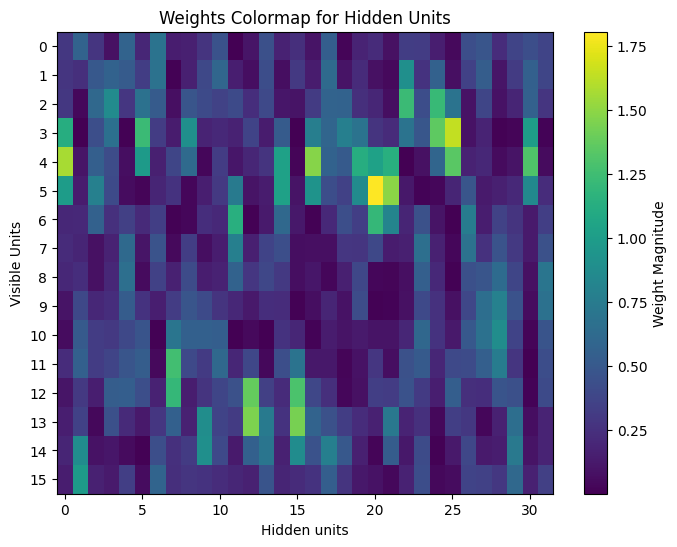

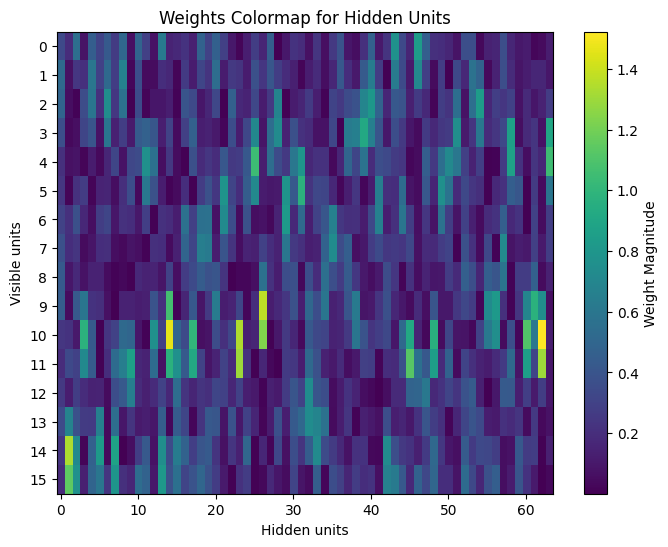

In [14]:
weights_2 = np.real(np.load("../data/16spin_2_SR.npz")['W'])
weights_2 = np.abs(weights_2)

plt.figure(figsize=(8, 6))
plt.imshow(weights_2, aspect='auto', cmap='viridis')
plt.colorbar(label='Weight Magnitude')
plt.xlabel('Hidden units')
ax = plt.gca()  # Get the current Axes instance
#ax.set_xticks(range(len(weights_2[0])))
ax.set_yticks(range(len(weights_2)))
plt.ylabel('Visible Units')
plt.title('Weights Colormap for Hidden Units')
plt.show()

weights_4 = np.real(np.load("../data/16spin_4_SR.npz")['W'])
weights_4 = np.abs(weights_4)

plt.figure(figsize=(8, 6))
plt.imshow(weights_4, aspect='auto', cmap='viridis')
plt.colorbar(label='Weight Magnitude')
plt.xlabel('Hidden units')
ax = plt.gca()  # Get the current Axes instance
#ax.set_xticks(range(len(weights_4[0])))
ax.set_yticks(range(len(weights_4)))
plt.ylabel('Visible units')
plt.title('Weights Colormap for Hidden Units')
plt.show()

In [15]:
from nnqs import RBM
from sampler import GibbsSampler

In [16]:
wave_2 = RBM(path="../data/16spin_2_SR.npz")
wave_4 = RBM(path="../data/16spin_4_SR.npz")

sam_2 = GibbsSampler(n_visible=wave_2.n_visible, n_hidden=wave_2.n_hidden, k=1, batch_size=5)
sam_4 = GibbsSampler(n_visible=wave_4.n_visible, n_hidden=wave_4.n_hidden, k=1, batch_size=5)


I0000 00:00:1752777020.160727    8503 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2609 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


In [17]:
samples_2 = sam_2.sample(wave_2)
samples_4 = sam_4.sample(wave_4)

print("Samples from wave_2:\n", samples_2.numpy())
print("Samples from wave_4:\n", samples_4.numpy())

Samples from wave_2:
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Samples from wave_4:
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


/home/steve/projects/nnqs/tf-gpu-venv/lib64/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/steve/projects/nnqs/tf-gpu-venv/lib64/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


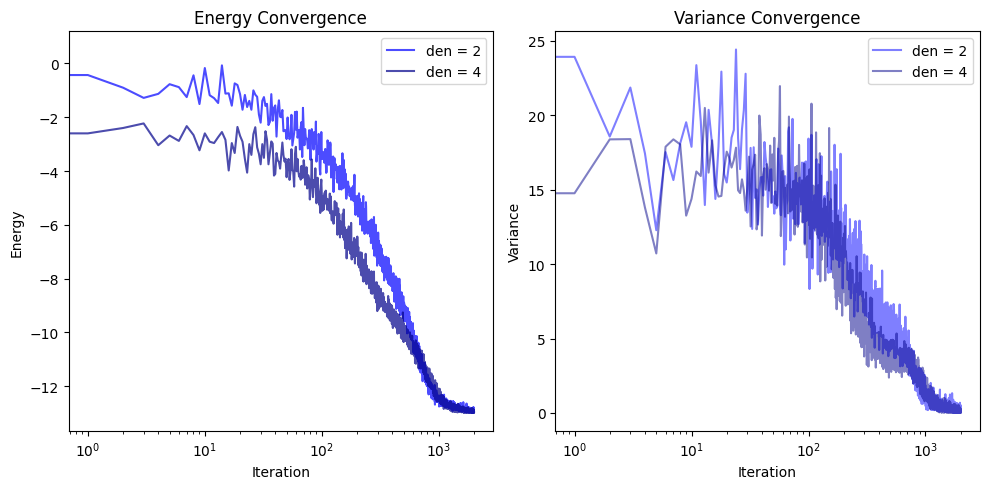

In [18]:
results_ising_2 = np.load("../data/Jm1_16spin_2_SR_history.npz")
results_ising_4 = np.load("../data/Jm1_16spin_4_SR_history.npz")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(results_ising_2['energies'], label='den = 2', color=blues[0], alpha=0.7)
plt.plot(results_ising_4['energies'], label='den = 4', color=blues[2], alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy Convergence')
plt.legend()
plt.xscale('log')
plt.subplot(1, 2, 2)
plt.plot(results_ising_2['variances'], label='den = 2', color=blues[0], alpha=0.5)
plt.plot(results_ising_4['variances'], label='den = 4', color=blues[2], alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('Variance')
plt.title('Variance Convergence')
plt.legend()
plt.xscale('log')
plt.tight_layout()
plt.show()

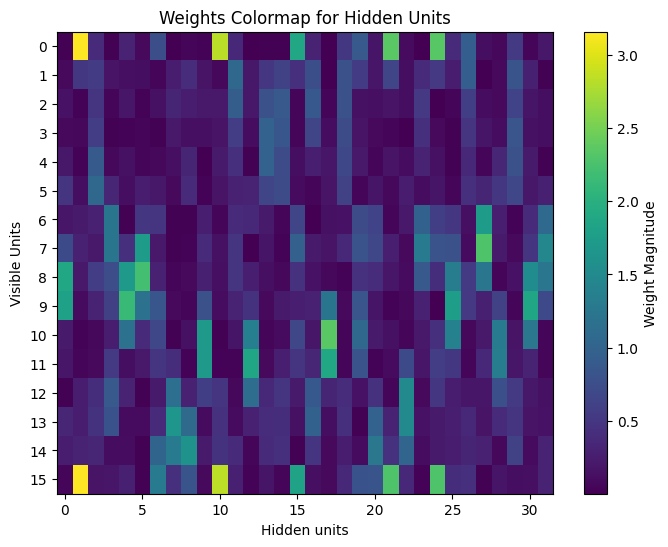

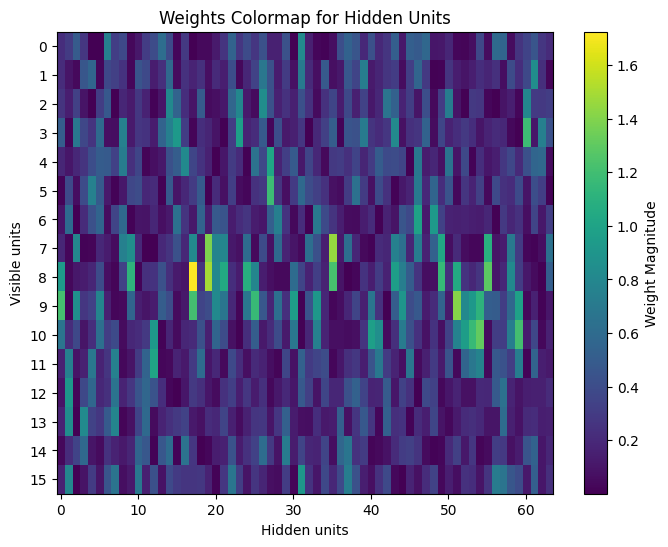

In [19]:
weights_2 = np.real(np.load("../data/Jm1_16spin_2_SR.npz")['W'])
weights_2 = np.abs(weights_2)

plt.figure(figsize=(8, 6))
plt.imshow(weights_2, aspect='auto', cmap='viridis')
plt.colorbar(label='Weight Magnitude')
plt.xlabel('Hidden units')
ax = plt.gca()  # Get the current Axes instance
#ax.set_xticks(range(len(weights_2[0])))
ax.set_yticks(range(len(weights_2)))
plt.ylabel('Visible Units')
plt.title('Weights Colormap for Hidden Units')
plt.show()

weights_4 = np.real(np.load("../data/Jm1_16spin_4_SR.npz")['W'])
weights_4 = np.abs(weights_4)

plt.figure(figsize=(8, 6))
plt.imshow(weights_4, aspect='auto', cmap='viridis')
plt.colorbar(label='Weight Magnitude')
plt.xlabel('Hidden units')
ax = plt.gca()  # Get the current Axes instance
#ax.set_xticks(range(len(weights_4[0])))
#ax.set_xticklabels(rotation=45)
ax.set_yticks(range(len(weights_4)))
plt.ylabel('Visible units')
plt.title('Weights Colormap for Hidden Units')
plt.show()

In [20]:
wave_2 = RBM(path="../data/Jm1_16spin_2_SR.npz")
wave_4 = RBM(path="../data/Jm1_16spin_4_SR.npz")

sam_2 = GibbsSampler(n_visible=wave_2.n_visible, n_hidden=wave_2.n_hidden, k=1, batch_size=5)
sam_4 = GibbsSampler(n_visible=wave_4.n_visible, n_hidden=wave_4.n_hidden, k=1, batch_size=5)

In [21]:
samples_2 = sam_2.sample(wave_2)
samples_4 = sam_4.sample(wave_4)

In [22]:
print("Samples from wave_2:\n", samples_2.numpy())
print("Samples from wave_4:\n", samples_4.numpy())

Samples from wave_2:
 [[0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]]
Samples from wave_4:
 [[0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.]]


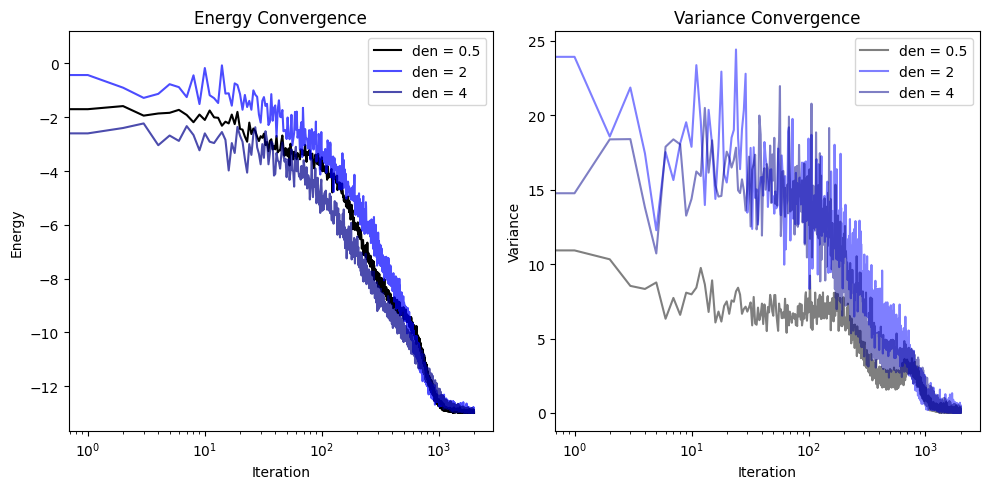

In [23]:
results_ising_05 = np.load("../data/Jm1_16spin_0.5_SR_history.npz")
results_ising_2 = np.load("../data/Jm1_16spin_2_SR_history.npz")
results_ising_4 = np.load("../data/Jm1_16spin_4_SR_history.npz")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(results_ising_05['energies'], label='den = 0.5', color='black')
plt.plot(results_ising_2['energies'], label='den = 2', color=blues[0], alpha=0.7)
plt.plot(results_ising_4['energies'], label='den = 4', color=blues[2], alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy Convergence')
plt.legend()
plt.xscale('log')
plt.subplot(1, 2, 2)
plt.plot(results_ising_05['variances'], label='den = 0.5', color='black', alpha=0.5)
plt.plot(results_ising_2['variances'], label='den = 2', color=blues[0], alpha=0.5)
plt.plot(results_ising_4['variances'], label='den = 4', color=blues[2], alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('Variance')
plt.title('Variance Convergence')
plt.legend()
plt.xscale('log')
plt.tight_layout()
plt.show()

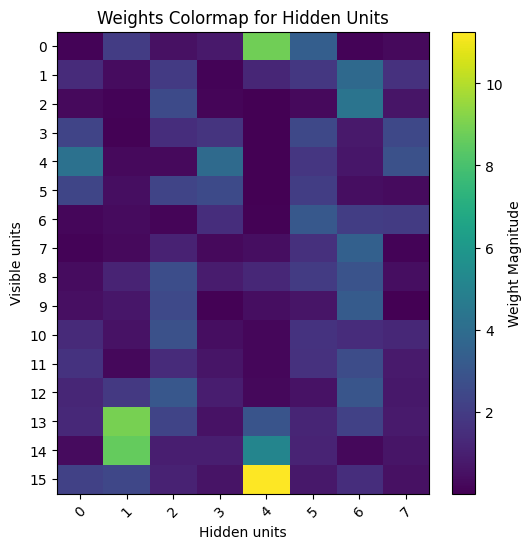

In [24]:
weights_05 = np.real(np.load("../data/Jm1_16spin_0.5_SR.npz")['W'])
weights_05 = np.abs(weights_05)

plt.figure(figsize=(6, 6))
plt.imshow(weights_05, aspect='auto', cmap='viridis')
plt.colorbar(label='Weight Magnitude')
plt.xlabel('Hidden units')
ax = plt.gca()  # Get the current Axes instance
ax.set_xticks(range(len(weights_05[0])))
ax.set_xticklabels(range(len(weights_05[0])), rotation=45)
ax.set_yticks(range(len(weights_05)))
plt.ylabel('Visible units')
plt.title('Weights Colormap for Hidden Units')
plt.show()

In [25]:
wave_05 = RBM(path="../data/Jm1_16spin_0.5_SR.npz")

sam_05 = GibbsSampler(n_visible=wave_05.n_visible, n_hidden=wave_05.n_hidden, k=1, batch_size=5)

In [26]:
samples_05 = sam_05.sample(wave_05)

print("Samples from wave_05:\n", samples_05.numpy())

Samples from wave_05:
 [[0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.]]
